<a href="https://colab.research.google.com/github/BusireddyHarshitha/BusireddyHarshitha/blob/main/Product_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('ProductDemandForecasting.csv')

In [ ]:
df.head()

,Month,Orders Sold
0,2021-01,2815
1,2021-02,2672
2,2021-03,2755
3,2021-04,2721
4,2021-05,2946


In [ ]:
df.tail()

,Month,Orders Sold
27,2023-04,3523
28,2023-05,3937
29,2023-06,3986
30,2023-07,3260
31,2023-08,1573


In [ ]:
df.columns=["Month","Orders Sold"]
df.head()

,Month,Orders Sold
0,2021-01,2815
1,2021-02,2672
2,2021-03,2755
3,2021-04,2721
4,2021-05,2946


In [ ]:
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Orders Sold
0,2021-01-01,2815
1,2021-02-01,2672
2,2021-03-01,2755
3,2021-04-01,2721
4,2021-05-01,2946


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Orders Sold
Month,
2021-01-01,2815
2021-02-01,2672
2021-03-01,2755
2021-04-01,2721
2021-05-01,2946


In [ ]:
df.describe()

,Orders Sold
count,32.000000
mean,3579.781250
std,1530.764025
min,1573.000000
25%,2746.500000
50%,3074.500000
75%,3949.250000
max,8357.000000


<Axes: xlabel='Month'>

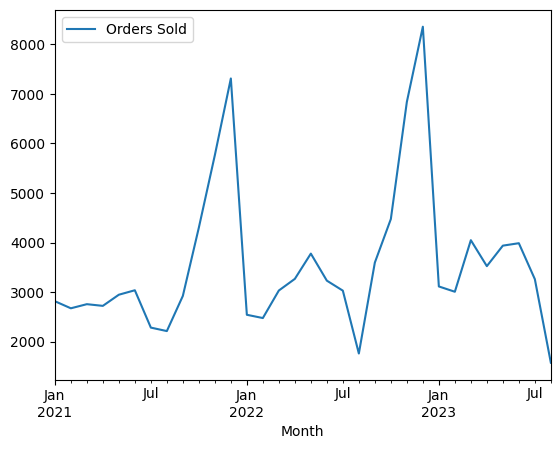

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Orders Sold'])

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['Orders Sold'])

ADF Test Statistic : -3.5998028866415153
p-value : 0.005764797253924987
#Lags Used : 1
Number of Observations Used : 30
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
pip install pandas

In [ ]:
import pandas as pd
import statsmodels.api as sm
p = 1  # Autoregressive order
d = 1  # Integration order (differencing)
q = 1  # Moving average order
model = sm.tsa.ARIMA(df['Orders Sold'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Orders Sold   No. Observations:                   32
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -269.495
Date:                Tue, 19 Sep 2023   AIC                            544.990
Time:                        15:57:43   BIC                            549.292
Sample:                    01-01-2021   HQIC                           546.393
                         - 08-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5352      0.084      6.378      0.000       0.371       0.700
ma.L1         -0.9995      0.228     -4.386      0.000      -1.446      -0.553
sigma2      1.917e+06    1.2e-07    1.6e+13      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Axes: xlabel='Month'>

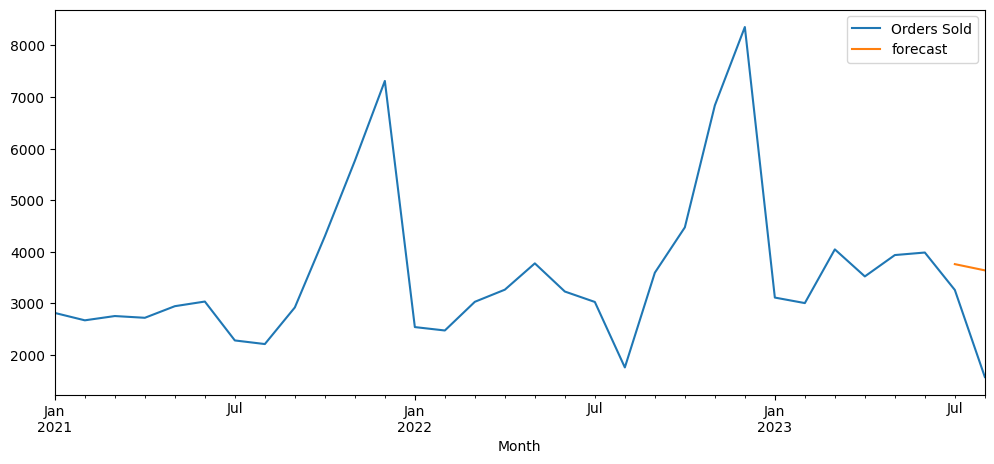

In [ ]:
df['forecast']=model_fit.predict(start=30,end=36,dynamic=True)
df[['Orders Sold','forecast']].plot(figsize=(12,5))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Orders Sold'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,Orders Sold,forecast
2025-03-01,NaN,NaN
2025-04-01,NaN,NaN
2025-05-01,NaN,NaN
2025-06-01,NaN,NaN
2025-07-01,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

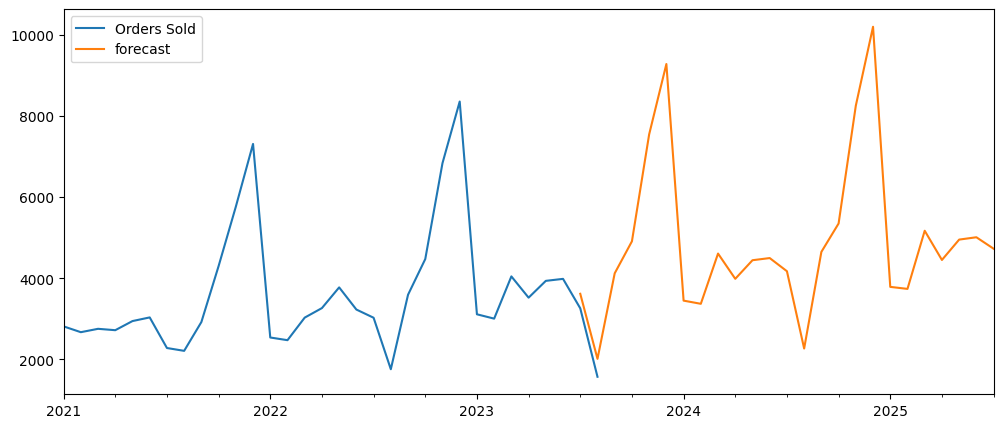

In [ ]:
future_df['forecast'] = results.predict(start = 30, end = 60, dynamic= True)
future_df[['Orders Sold', 'forecast']].plot(figsize=(12, 5))